In [1]:
import csv

In [2]:
reviews = []

with open('./IMDB Dataset.csv', 'r', encoding='utf-8') as csvfile:
    csv_reader = csv.DictReader(csvfile)
    for row in csv_reader:
        
        review = row['review'].replace("<br /><br />", " ")
        reviews.append(review)

In [3]:
# tokenized_reviews = [review.split() for review in reviews]
# words = [token for sublist in tokenized_reviews for token in sublist]
words=tokenized_reviews = [review.split() for review in reviews]

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(words)
vocab_size = len(tokenizer.word_index)

In [4]:
words[:10]

[['One',
  'of',
  'the',
  'other',
  'reviewers',
  'has',
  'mentioned',
  'that',
  'after',
  'watching',
  'just',
  '1',
  'Oz',
  'episode',
  "you'll",
  'be',
  'hooked.',
  'They',
  'are',
  'right,',
  'as',
  'this',
  'is',
  'exactly',
  'what',
  'happened',
  'with',
  'me.',
  'The',
  'first',
  'thing',
  'that',
  'struck',
  'me',
  'about',
  'Oz',
  'was',
  'its',
  'brutality',
  'and',
  'unflinching',
  'scenes',
  'of',
  'violence,',
  'which',
  'set',
  'in',
  'right',
  'from',
  'the',
  'word',
  'GO.',
  'Trust',
  'me,',
  'this',
  'is',
  'not',
  'a',
  'show',
  'for',
  'the',
  'faint',
  'hearted',
  'or',
  'timid.',
  'This',
  'show',
  'pulls',
  'no',
  'punches',
  'with',
  'regards',
  'to',
  'drugs,',
  'sex',
  'or',
  'violence.',
  'Its',
  'is',
  'hardcore,',
  'in',
  'the',
  'classic',
  'use',
  'of',
  'the',
  'word.',
  'It',
  'is',
  'called',
  'OZ',
  'as',
  'that',
  'is',
  'the',
  'nickname',
  'given',
  'to'

In [5]:
print(len(words))

50000


In [6]:
print(words[:1])

[['One', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'Oz', 'episode', "you'll", 'be', 'hooked.', 'They', 'are', 'right,', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me.', 'The', 'first', 'thing', 'that', 'struck', 'me', 'about', 'Oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence,', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'GO.', 'Trust', 'me,', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid.', 'This', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs,', 'sex', 'or', 'violence.', 'Its', 'is', 'hardcore,', 'in', 'the', 'classic', 'use', 'of', 'the', 'word.', 'It', 'is', 'called', 'OZ', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary.', 'It', 'focuses', 'mainly', 'on', 'Emerald', 'City,', 'an', 'experimental', 'section', 'of', 'the', 'prison', 'where', 'all', 't

In [7]:
b_word = {}

for w in words[:1]:
    
    for w1, w2 in zip(w, w[1:]):
#for w1, w2 in zip(words, words[1:]):
        bigram = (w1, w2)
        b_word[bigram] = b_word.get(bigram, 0) + 1

In [8]:
sorted(b_word.items(), key = lambda kv: -kv[1])

[(('of', 'the'), 4),
 (('to', 'the'), 3),
 (('this', 'is'), 2),
 (('The', 'first'), 2),
 (('struck', 'me'), 2),
 (('is', 'not'), 2),
 (('due', 'to'), 2),
 (('One', 'of'), 1),
 (('the', 'other'), 1),
 (('other', 'reviewers'), 1),
 (('reviewers', 'has'), 1),
 (('has', 'mentioned'), 1),
 (('mentioned', 'that'), 1),
 (('that', 'after'), 1),
 (('after', 'watching'), 1),
 (('watching', 'just'), 1),
 (('just', '1'), 1),
 (('1', 'Oz'), 1),
 (('Oz', 'episode'), 1),
 (('episode', "you'll"), 1),
 (("you'll", 'be'), 1),
 (('be', 'hooked.'), 1),
 (('hooked.', 'They'), 1),
 (('They', 'are'), 1),
 (('are', 'right,'), 1),
 (('right,', 'as'), 1),
 (('as', 'this'), 1),
 (('is', 'exactly'), 1),
 (('exactly', 'what'), 1),
 (('what', 'happened'), 1),
 (('happened', 'with'), 1),
 (('with', 'me.'), 1),
 (('me.', 'The'), 1),
 (('first', 'thing'), 1),
 (('thing', 'that'), 1),
 (('that', 'struck'), 1),
 (('me', 'about'), 1),
 (('about', 'Oz'), 1),
 (('Oz', 'was'), 1),
 (('was', 'its'), 1),
 (('its', 'brutality'

In [9]:
words = [review.split() for review in reviews]

# Flatten the list of tokenized words
all_words = [word for review_words in words for word in review_words]

# Create a set of unique words
unique_words = sorted(list(set(all_words)))

# Create word-to-index mapping
stoi = {word: i for i, word in enumerate(unique_words)}

# Create index-to-word mapping
itos = {i: word for i, word in enumerate(unique_words)}

In [10]:
print(stoi.get("the"))

#386224

386224


In [28]:
import torch

In [30]:
# create the training set of bigrams (x,y)
xs, ys = [], []

for w in words[:1]:
    
    for w1, w2 in zip(w, w[1:]):
        ix1 = stoi.get(w1)
        ix2 = stoi.get(w2)
        print(w1,w2)
#         if ix1 != -1 and ix2 != -1:
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

print("xs:", xs)
print("ys:", ys)

One of
of the
the other
other reviewers
reviewers has
has mentioned
mentioned that
that after
after watching
watching just
just 1
1 Oz
Oz episode
episode you'll
you'll be
be hooked.
hooked. They
They are
are right,
right, as
as this
this is
is exactly
exactly what
what happened
happened with
with me.
me. The
The first
first thing
thing that
that struck
struck me
me about
about Oz
Oz was
was its
its brutality
brutality and
and unflinching
unflinching scenes
scenes of
of violence,
violence, which
which set
set in
in right
right from
from the
the word
word GO.
GO. Trust
Trust me,
me, this
this is
is not
not a
a show
show for
for the
the faint
faint hearted
hearted or
or timid.
timid. This
This show
show pulls
pulls no
no punches
punches with
with regards
regards to
to drugs,
drugs, sex
sex or
or violence.
violence. Its
Its is
is hardcore,
hardcore, in
in the
the classic
classic use
use of
of the
the word.
word. It
It is
is called
called OZ
OZ as
as that
that is
is the
the nickname
nicknam

In [31]:
print(len(words[:1]))

1


In [32]:
xs

tensor([150452, 327346, 386224, 330368, 354834, 284137, 313672, 386007, 205396,
        404011, 300365,  47943, 151641, 260674, 411131, 216895, 288797, 185373,
        211130, 355479, 212050, 387709, 297808, 262670, 405911, 283548, 407865,
        312453, 185128, 270146, 387266, 386007, 378657, 312331, 202316, 151641,
        403608, 298847, 224638, 208462, 397104, 359977, 327346, 401649, 406233,
        364396, 293260, 355455, 274338, 386224, 408729, 104144, 188542, 312387,
        387709, 297808, 325268, 201931, 366793, 272284, 386224, 265566, 285161,
        329801, 389641, 185536, 366793, 346263, 323779, 346373, 407865, 351635,
        389950, 255429, 364697, 329801, 401663, 120235, 297808, 283886, 293260,
        386224, 233194, 399485, 327346, 386224, 408770, 120084, 297808, 226658,
        149563, 212050, 386007, 297808, 386224, 323354, 277799, 389950, 386224,
        151208, 138751, 171856, 178670, 154707, 120084, 271760, 309904, 328412,
         95743,  80311, 208300, 263837, 

In [33]:
len(xs)

303

In [34]:
ys

tensor([327346, 386224, 330368, 354834, 284137, 313672, 386007, 205396, 404011,
        300365,  47943, 151641, 260674, 411131, 216895, 288797, 185373, 211130,
        355479, 212050, 387709, 297808, 262670, 405911, 283548, 407865, 312453,
        185128, 270146, 387266, 386007, 378657, 312331, 202316, 151641, 403608,
        298847, 224638, 208462, 397104, 359977, 327346, 401649, 406233, 364396,
        293260, 355455, 274338, 386224, 408729, 104144, 188542, 312387, 387709,
        297808, 325268, 201931, 366793, 272284, 386224, 265566, 285161, 329801,
        389641, 185536, 366793, 346263, 323779, 346373, 407865, 351635, 389950,
        255429, 364697, 329801, 401663, 120235, 297808, 283886, 293260, 386224,
        233194, 399485, 327346, 386224, 408770, 120084, 297808, 226658, 149563,
        212050, 386007, 297808, 386224, 323354, 277799, 389950, 386224, 151208,
        138751, 171856, 178670, 154707, 120084, 271760, 309904, 328412,  95743,
         80311, 208300, 263837, 362022, 

In [35]:
max_index = xs.max().item()

# Adjust num_classes based on the maximum index in xs
num_classes = max_index + 1


In [36]:
print(num_classes)

411361


In [37]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=num_classes).float()
xenc

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [38]:
xenc[1]

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [39]:
xenc.shape

torch.Size([303, 411361])

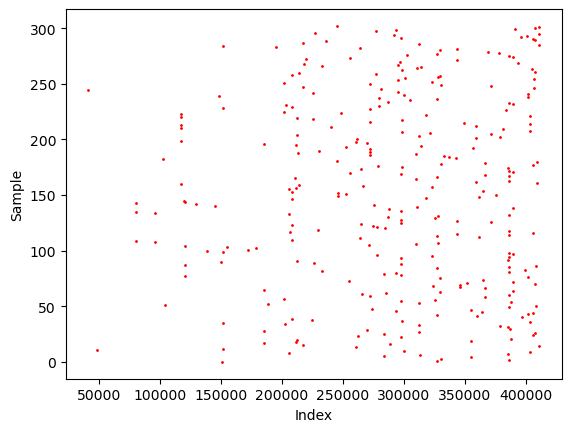

In [41]:
import matplotlib.pyplot as plt

# Get the coordinates of non-zero values
non_zero_coords = xenc.nonzero()

plt.scatter(non_zero_coords[:, 1], non_zero_coords[:, 0], color='red', s=1)  # Scatter plot with red dots
plt.xlabel('Index')
plt.ylabel('Sample')
plt.show()


In [42]:
xenc.dtype

torch.float32

In [ ]:
W = torch.randn((num_classes, num_classes))
xenc @ W

In [39]:
logits = xenc @ W # log-counts
counts = logits.exp() # equivalent N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0006, 0.0046, 0.0019,  ..., 0.0026, 0.0061, 0.0024],
        [0.0323, 0.0043, 0.0029,  ..., 0.0017, 0.0031, 0.0155],
        [0.0006, 0.0046, 0.0019,  ..., 0.0026, 0.0061, 0.0024],
        ...,
        [0.0323, 0.0043, 0.0029,  ..., 0.0017, 0.0031, 0.0155],
        [0.0006, 0.0046, 0.0019,  ..., 0.0026, 0.0061, 0.0024],
        [0.0018, 0.0277, 0.0026,  ..., 0.0015, 0.0010, 0.0016]])

In [606]:
# --------- OPTIMIZATION  --------------

In [22]:
# create the dataset
xs, ys = [], []
for w1, w2 in zip(words, words[1:]):
    
    ix1 = stoi.get(w1, -1)
    ix2 = stoi.get(w2, -1)
    if ix1 != -1 and ix2 != -1:
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

num = xs.nelement()
print('Number of examples:', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((num_classes, num_classes))

TypeError: unhashable type: 'list'

In [ ]:
# gradient descent
for k in range(5):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  #print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

print("Final Loss:", loss.item())

In [43]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

cexze.
momasurailezityha.
konimittain.
llayn.
ka.
